## Predicting Car Prices

In this guided project, you'll practice the machine learning workflow you've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

### Introduction to the data set

- Read imports-85.data into a dataframe named cars. If you read in the file using pandas.read_csv() without specifying any additional parameter values, you'll notice that the column names don't match the ones in the dataset's documentation. Why do you think this is and how can you fix this?
- Determine which columns are numeric and can be used as features and which column is the target column.
- Display the first few rows of the dataframe and make sure it looks like the data set preview.

In [89]:
import pandas as pd
import numpy as np
from pandas import DataFrame
pd.options.display.max_columns = 99

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# when columns names appear in a wrong way, you can fix it by creating a list with the correct names and passing it when 
# reading the file
columns = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','enginge_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']


# pass the list in .read_csv()
cars = pd.read_csv(r'C:\Users\msantos\Downloads\imports-85.data', names=columns)
pd.options.display.max_columns = 99

In [92]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,enginge_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Determine which columns are numeric and can be used as features and which column is the target column.

In [93]:
# Checking which columns are numeric and which are made of text types
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
enginge_type          object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

Selecionando apenas as colunas que possuem dados numéricos e contínuos

In [94]:
# selecionar apenas colunas com dados contínuos
cols = ['normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars_num = cars[cols]

## Data Cleaning

In [95]:
cars_num

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


Use the DataFrame.replace() method to replace all of the ? values with the numpy.nan missing value.

In [96]:
#Clean up ?s so we can analyze missing data
cars_num = cars_num.replace('?',np.nan)
cars_num

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


Because ? is a string value, columns containing this value were cast to the pandas object data type (instead of a numeric type like int or float). After replacing the ? values, determine which columns need to be converted to numeric types. You can use either the DataFrame.astype() or the Series.astype() methods to convert column types.

In [97]:
# Convert all columns to numeric and report on  missing values.
cars_num = cars_num.astype('float64')
cars_num.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Return the number of rows that have a missing value for the **normalized-losses** column.

In [98]:
cars_num.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Replace the missing values using the average values from that column.

In [99]:
# The rest of the missing values can be estimated by the average of all non-missing values.
# This is not ideal, but should have little impact on our model.
cars_num = cars_num.fillna(cars_num.mean())
cars_num.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [100]:
# We want to predict price, so we'll get rid of all rows without a price value
cars_num = cars_num.dropna(subset = ['price'])

Of the columns you decided to keep, normalize the numeric ones so all values range from 0 to 1.

In [101]:
# Normalize all columns to be in range 0 to 1 except target 'price' column.
price_col = cars_num['price']
cars_num = (cars_num - cars_num.min()) / (cars_num.max() - cars_num.min())
cars_num['price'] = price_col

In [102]:
cars_num

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,22470.0


### Univariate Model

Let's start with some **univariate k-nearest neighbors** models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

Create a function, named **knn_train_test()** that encapsulates the training and simple validation process.

This function should have 3 parameters:

- training column name;
- target column name;
- the dataframe object.

Also:

- This function should split the data set into a training and test set.
- Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
- Finally, it should calculate the RMSE and return that value.

Use this function to train and test univariate models using the different numeric columns in the data set. Decide which column performed the best using the default k value.

Modify the knn_train_test() function you wrote to accept a parameter for the k value.
- Update the function logic to use this parameter.
- For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.

In [103]:
# Create a single test-column train/test function.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col,target_col,df,k=5):
    np.random.seed(3)
    
    # Randomize the order of the rows.
    df = df.reindex(np.random.permutation(df.index))
    
    # Split he dataset in half to create a training and a testing set.
    split_num = int(df.shape[0] / 2)
    train_set = df[:split_num]
    test_set = df[split_num:]
    
    # Fit a KNN model.
    knn = KNeighborsRegressor(k)
    knn.fit(train_set[[train_col]],train_set[target_col])
    
    # Make predictions using the trained model.
    predictions = knn.predict(test_set[[train_col]])
    
    # Calculate and return RMSE.
    return np.sqrt(mean_squared_error(test_set[target_col],predictions))

In [104]:
# Find best single column test using default k=5.
# Train and test a model using each column except 'price'.
rmses = [[col,knn_train_test(col,'price',cars_num)] for col in cars_num.columns.drop('price')]
teste = sorted(rmses,key=lambda x: x[1])

In [105]:
teste

[['engine_size', 4032.131371421619],
 ['curb_weight', 4117.28585532948],
 ['horsepower', 4514.973490201994],
 ['highway_mpg', 4543.031245429424],
 ['city_mpg', 4617.729037627224],
 ['width', 4933.651770830159],
 ['length', 4982.787947832771],
 ['wheel_base', 5752.806153552231],
 ['normalized_losses', 6360.431865053065],
 ['compression_ratio', 6406.494427801184],
 ['bore', 6941.855584347496],
 ['peak_rpm', 7229.316094562994],
 ['stroke', 7477.787390608449],
 ['height', 7522.250659046747]]

Visualizar resultados para facilitar escolha da coluna que apresenta menor erro

In [106]:
df = DataFrame(teste, columns=['Column Names', 'RMSE'])

In [107]:
df

,Column Names,RMSE
0,engine_size,4032.131371
1,curb_weight,4117.285855
2,horsepower,4514.973490
3,highway_mpg,4543.031245
4,city_mpg,4617.729038
5,width,4933.651771
6,length,4982.787948
7,wheel_base,5752.806154
8,normalized_losses,6360.431865
9,compression_ratio,6406.494428


In [108]:
pd.pivot_table(df, index = 'Column Names', values='RMSE')

,RMSE
Column Names,
bore,6941.855584
city_mpg,4617.729038
compression_ratio,6406.494428
curb_weight,4117.285855
engine_size,4032.131371
height,7522.250659
highway_mpg,4543.031245
horsepower,4514.973490
length,4982.787948


Text(0, 0.5, 'Happiness Rank')

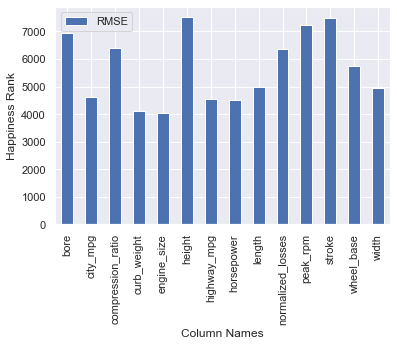

In [109]:
# use Seaborn styles
sns.set()
pd.pivot_table(df, index= 'Column Names', values= "RMSE").plot(kind= 'bar')
plt.ylabel("Happiness Rank")

According to the graph and to the values obtained in the variable 'teste', engine_size column performed the best.

Modify the knn_train_test() function you wrote to accept a parameter for the k value.
- Update the function logic to use this parameter.
- For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.

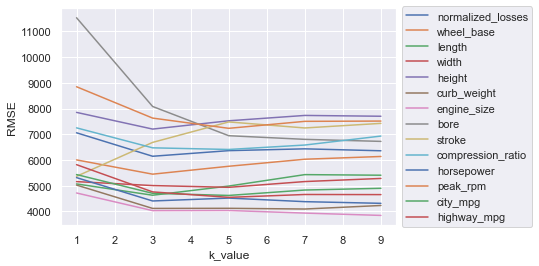

In [110]:
# Get error values for multiple columns using multiple k values.
k_list = [1,3,5,7,9]
col_names = []
col_rmses = []
# For each non 'price' column, create a list of rmses for k in k_list and append to col_rmses.
for col in cars_num.columns.drop('price'):
    rmses = []
    for k in k_list:
        rmses.append(knn_train_test(col,'price',cars_num,k))
    col_names.append(col)
    col_rmses.append(rmses)

# Plot these values.
%matplotlib inline
from matplotlib import pyplot as plt
for i in range(len(col_names)):
    plt.plot(k_list,col_rmses[i],label=col_names[i])
plt.xlabel('k_value')
plt.ylabel('RMSE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Multivariate model

Now let's modify the **knn_train_test()** function we wrote in the last step to work with multiple columns.

Modify the knn_train_test() function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter:

- Instead of using just a single column for train and test, use all of the columns passed in.
- Use a the default k value from scikit-learn for now (we'll tune the k value in the next step).

In [111]:
# Average RSME values from last step for each feature across k values.
average_rmses = [[sum(col_rmses[i])/len(col_rmses[i]),col_names[i]] for i in range(len(col_rmses))]
sorted(average_rmses)

[[4108.745225187651, 'engine_size'],
 [4313.608018871445, 'curb_weight'],
 [4583.015397527456, 'horsepower'],
 [4883.790943293288, 'highway_mpg'],
 [4894.416667053423, 'city_mpg'],
 [5101.420433468257, 'length'],
 [5105.667666386122, 'width'],
 [5871.893597357374, 'wheel_base'],
 [6468.805357412124, 'normalized_losses'],
 [6726.102777306766, 'compression_ratio'],
 [6837.366229294879, 'stroke'],
 [7600.145014621138, 'height'],
 [7742.911043018629, 'peak_rpm'],
 [8014.533450890793, 'bore']]

In [112]:
# Create a function to test and train a KNN model that uses multiple training columns.
def knn_train_test(train_cols,target_col,df,k=5):
    np.random.seed(3)
    
    # Randomize order of dataset rows.
    df = df.reindex(np.random.permutation(df.index))
    
    # Split rows into training and testing sets.
    split_num = int(df.shape[0] / 2)
    train_set = df[:split_num]
    test_set = df[split_num:]
    
    # Train a KNN model using selected columns.
    knn = KNeighborsRegressor(k)
    knn.fit(train_set[train_cols],train_set[target_col])
    
    # Generate predictions from the trained model.
    predictions = knn.predict(test_set[train_cols])
    
    # Calculate and return RMSE.
    return np.sqrt(mean_squared_error(test_set[target_col],predictions))

In [113]:
# Train and test models using the best (predictively) two,three,four and five individual features.
rmse_values = {}

# Create list of best singly predictive features.
features_sorted = [x[1] for x in sorted(average_rmses)]

# Best Feature lists.
best_two = features_sorted[:2]
best_three = features_sorted[:3]
best_four = features_sorted[:4]
best_five = features_sorted[:5]

# Train/test and evaluate modesl using the features.
rmse_values['best_two_features'] = knn_train_test(best_two,'price',cars_num)
rmse_values['best_three_features'] = knn_train_test(best_three,'price',cars_num)
rmse_values['best_four_features'] = knn_train_test(best_four,'price',cars_num)
rmse_values['best_five_features'] = knn_train_test(best_five,'price',cars_num)

pd.Series(rmse_values).sort_values()

best_two_features      3772.500323
best_three_features    3779.063671
best_five_features     3931.917813
best_four_features     3989.075934
dtype: float64

#### Hyperparameter Tuning

Let's now optimize the model that performed the best in the previous step.

- For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
- Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?

In [114]:
# Using the best combinations from the last step (4,3 and 5 features) from the last step, we tune k.
# Varying k from 1 to 25, train and test models using 4, 3, and 5 features.
k_values = [i for i in range(1,26)]
k_rmse_values = {}

# best_three_features
rmse_values = {}
for k in k_values:
    rmse_values[k] =  knn_train_test(best_three,'price',cars_num,k)
k_rmse_values['best_three_features'] = rmse_values

# best_four_features
rmse_values = {}
for k in k_values:
    rmse_values[k] =  knn_train_test(best_four,'price',cars_num,k)
k_rmse_values['best_four_features'] = rmse_values

# best_five_features
rmse_values = {}
for k in k_values:
    rmse_values[k] =  knn_train_test(best_five,'price',cars_num,k)
k_rmse_values['best_five_features'] = rmse_values

k_rmse_values

{'best_three_features': {1: 3113.8943087778885,
  2: 3345.622095302476,
  3: 3372.2045160043926,
  4: 3838.941187425793,
  5: 3779.0636714969223,
  6: 3833.9412809764685,
  7: 3942.1800208149602,
  8: 4063.857345072253,
  9: 4021.1331634321564,
  10: 4024.808061235014,
  11: 4008.6493979762986,
  12: 4124.035113338265,
  13: 4115.458626934082,
  14: 4140.6578561306505,
  15: 4190.513145855728,
  16: 4192.397319307651,
  17: 4205.677362848724,
  18: 4172.391117042933,
  19: 4191.085160816695,
  20: 4221.198404992112,
  21: 4182.0174516345305,
  22: 4212.877441500749,
  23: 4264.022457346481,
  24: 4264.281432007704,
  25: 4305.708276129466},
 'best_four_features': {1: 2868.946662589309,
  2: 3280.3274390801366,
  3: 3513.768006180216,
  4: 3837.891133074337,
  5: 3989.075933725781,
  6: 3928.7266898245125,
  7: 4026.1556866347396,
  8: 4123.675183649813,
  9: 4078.7990998206046,
  10: 4092.6815744743103,
  11: 4106.801240902534,
  12: 4145.431640305609,
  13: 4168.22068901347,
  14: 420

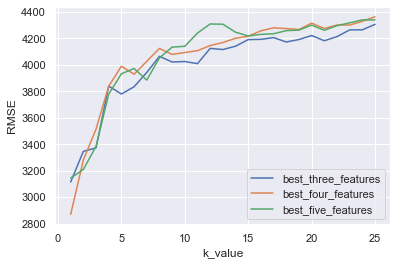

In [115]:
for k,v in k_rmse_values.items():
    plt.plot(list(v.keys()),list(v.values()),label=k)
plt.xlabel('k_value')
plt.ylabel('RMSE')
plt.legend()
plt.show()

For the best four and five features, the optimal k value is 1. For the best three features, the optimal k value is 3.

This could mean, that if we are using the best four or five features the KNN model will generally make the best prediction of price based on the one closest car (using these features). However, when using only the best three features, the closest car based on these features is not the best predictor of price. The model needs to look at a few more similar cars to get a better estimate of price.

Why does removing the random seed make this last graph look worse?

#### K-fold Validation

In [116]:
# Create a function to train a KNN model using multiple training columns and test it using K-fold validation.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Using 10 folds.
def knn_train_test(train_cols,target_col,df,k=5,folds=10):
    
    # Instantiate a KNN model.
    knn = KNeighborsRegressor(k)
    
    # Instantiate KFold so that it will randomize data.
    kf = KFold(folds,shuffle=True)
    
    # Run 10-fold cross validation to get a list of RMSES.
    mses = cross_val_score(knn, df[train_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    
    
    # Calculate and average and std. dev. of RMSES.
    return [np.mean(rmses),np.std(rmses)]

In [117]:
knn_train_test(best_five,'price',cars_num)

[3257.172937853849, 1177.4831865423398]

In [118]:
# Using the best combinations from the last step (4,3 and 5 features) from the last  step we tune k.
# Varying k from 1 to 25, train and test models using 4, 3, and 5 features.
k_values = [i for i in range(1,26)]
k_rmse_values = {}

#best_three_features
rmse_values = {}
for k in k_values:
    rmse_values[k] =  knn_train_test(best_three,'price',cars_num,k)[0]
k_rmse_values['best_three_features'] = rmse_values

#best_four_features
rmse_values = {}
for k in k_values:
    rmse_values[k] =  knn_train_test(best_four,'price',cars_num,k)[0]
k_rmse_values['best_four_features'] = rmse_values

#best_five_features
rmse_values = {}
for k in k_values:
    rmse_values[k] =  knn_train_test(best_five,'price',cars_num,k)[0]
k_rmse_values['best_five_features'] = rmse_values

k_rmse_values

{'best_three_features': {1: 2976.3168791342064,
  2: 3043.0817403895,
  3: 3116.6310820156896,
  4: 3331.321301705861,
  5: 3717.124406293332,
  6: 3781.3135114458555,
  7: 3672.729645900103,
  8: 3685.644596024569,
  9: 3561.5743448598287,
  10: 3689.328140430526,
  11: 3614.3297100143927,
  12: 3684.827173870765,
  13: 3723.5659031231344,
  14: 3689.7735793034008,
  15: 3648.334100858866,
  16: 3988.19216889503,
  17: 3924.562102872952,
  18: 3916.7589014965497,
  19: 3992.257658760142,
  20: 4029.9591341257133,
  21: 3990.956001513166,
  22: 4107.722658692095,
  23: 4083.6302551564922,
  24: 4160.764442719148,
  25: 4179.288616255742},
 'best_four_features': {1: 2756.047099521188,
  2: 2827.935135727825,
  3: 2937.1854379043352,
  4: 3261.180586593159,
  5: 3355.007624348679,
  6: 3478.4782150571564,
  7: 3700.818926908786,
  8: 3670.640501798555,
  9: 3813.1128036826294,
  10: 3727.6378897248333,
  11: 3680.1385211952684,
  12: 3690.9238021672763,
  13: 3861.6395264803105,
  14: 39

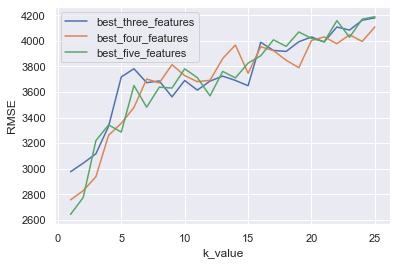

In [119]:
for k,v in k_rmse_values.items():
    plt.plot(list(v.keys()),list(v.values()),label=k)
plt.xlabel('k_value')
plt.ylabel('RMSE')
plt.legend()
plt.show()